In [1]:
# fill object with None
# fill number with mean

# EDA plot
# select features with Correlation larger than 0.4
# remove outlier
# StandardScaler

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Input File

In [4]:
Data_train=pd.read_csv('./data/train.csv')

Data_test=pd.read_csv('./data/test.csv')

Data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
Data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


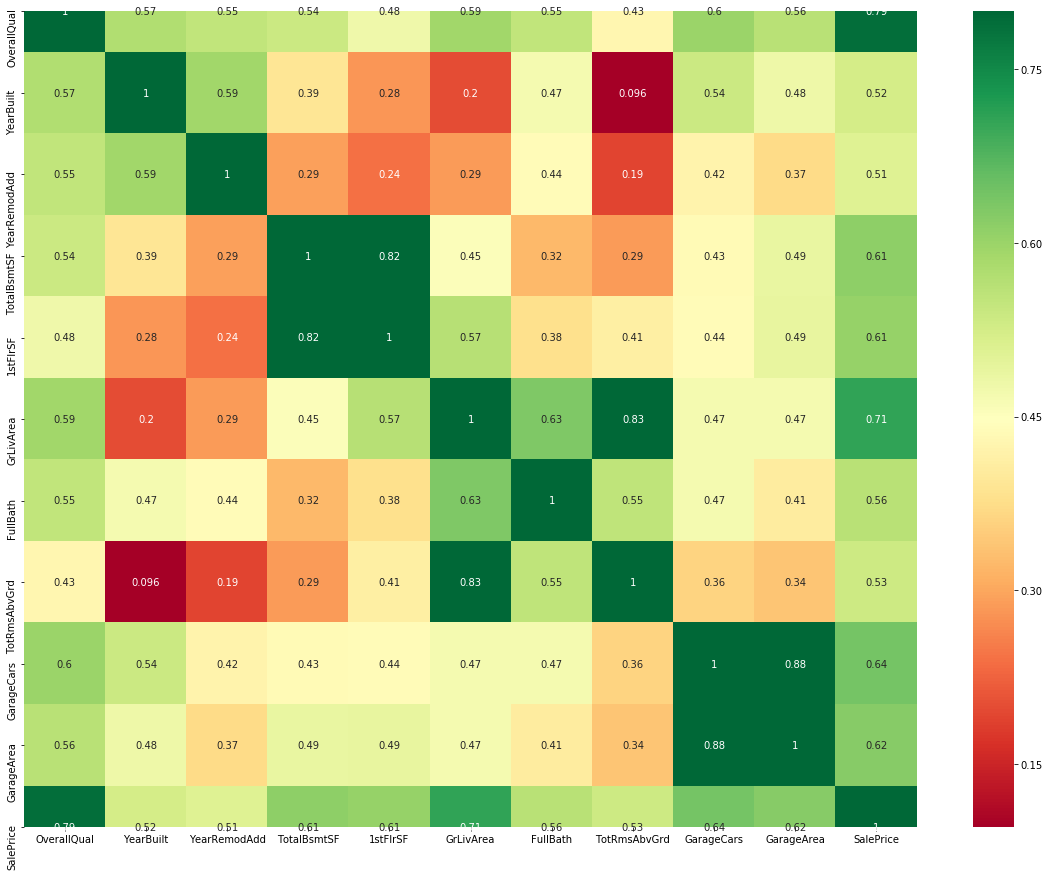

In [6]:
#correlation matrix
corrmat = Data_train.corr()
corrmatindex = corrmat['SalePrice'][abs(corrmat['SalePrice'])>0.5].index
corrmat = Data_train[corrmatindex].corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8, annot=True,cmap="RdYlGn");

# Skewness Processing

Skewness: 1.882876
Kurtosis: 6.536282


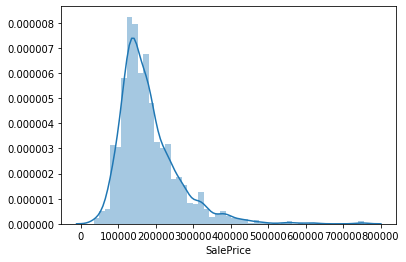

In [7]:
sns.distplot(Data_train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % Data_train['SalePrice'].skew())
print("Kurtosis: %f" % Data_train['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


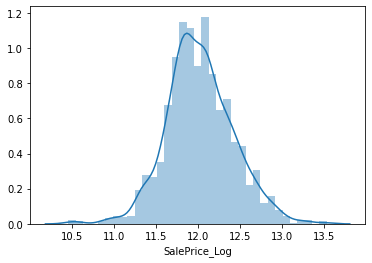

In [8]:
Data_train['SalePrice_Log'] = np.log(Data_train['SalePrice'])

sns.distplot(Data_train['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % Data_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % Data_train['SalePrice_Log'].kurt())

SalePrice_Log=Data_train['SalePrice_Log']
SalePrice=Data_train['SalePrice']

# dropping old column
Data_train.drop('SalePrice', axis= 1, inplace=True)

# 空值處理 

In [9]:
AllData=pd.concat([Data_train,Data_test])

In [10]:
#drop null>400 columns
dropList=AllData.isnull().sum()[AllData.isnull().sum()>400].index
AllData.drop(dropList,axis=1,inplace=True)

In [11]:
AllData.isnull().sum()[AllData.isnull().sum()>0]

BsmtCond         82
BsmtExposure     82
BsmtFinSF1        1
BsmtFinSF2        1
BsmtFinType1     79
BsmtFinType2     80
BsmtFullBath      2
BsmtHalfBath      2
BsmtQual         81
BsmtUnfSF         1
Electrical        1
Exterior1st       1
Exterior2nd       1
Functional        2
GarageArea        1
GarageCars        1
GarageCond      159
GarageFinish    159
GarageQual      159
GarageType      157
GarageYrBlt     159
KitchenQual       1
MSZoning          4
MasVnrArea       23
MasVnrType       24
SaleType          1
TotalBsmtSF       1
Utilities         2
dtype: int64

In [12]:
numerical_feats = AllData.dtypes[AllData.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = AllData.dtypes[AllData.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  36
Number of Categorical features:  38


In [13]:
for i in categorical_feats:
    AllData[i].fillna('None',inplace=True)

In [14]:
for i in numerical_feats:
    AllData[i].fillna( AllData[i].mean(),inplace=True)

In [15]:
AllData.isnull().sum()[AllData.isnull().sum()>0]

Series([], dtype: int64)

In [16]:
AllData

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,Twnhs,TA,No,0.0,0.0,Unf,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,3,1Fam,TA,Av,337.0,0.0,GLQ,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


# Faeatures Engineer

# Select Faeatures (All) Encoding

In [46]:
t=Data_train.corrwith(SalePrice_Log)
selectFeatures=t[abs(t)>0.4].index

1stFlrSF        0.596981
2ndFlrSF        0.319300
3SsnPorch       0.054900
BedroomAbvGr    0.209044
BldgType       -0.072558
                  ...   
Utilities      -0.012632
WoodDeckSF      0.334135
YearBuilt       0.586570
YearRemodAdd    0.565608
YrSold         -0.037263
Length: 74, dtype: float64


Index(['1stFlrSF', 'BsmtQual', 'ExterQual', 'Fireplaces', 'Foundation',
       'FullBath', 'GarageArea', 'GarageCars', 'GarageFinish', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HeatingQC', 'KitchenQual', 'MasVnrArea',
       'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [64]:
t=t.sort_values()

In [65]:
t.mean()

0.1313321076376148

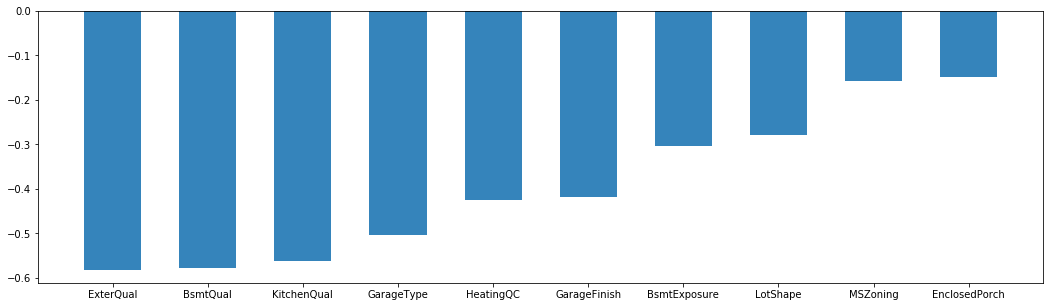

In [80]:
plt.subplots(figsize=(18,5))
plt.bar(t.index[0:10], t[0:10], alpha=0.9, width = 0.6 ,lw=1)
plt.show()
plt.close()

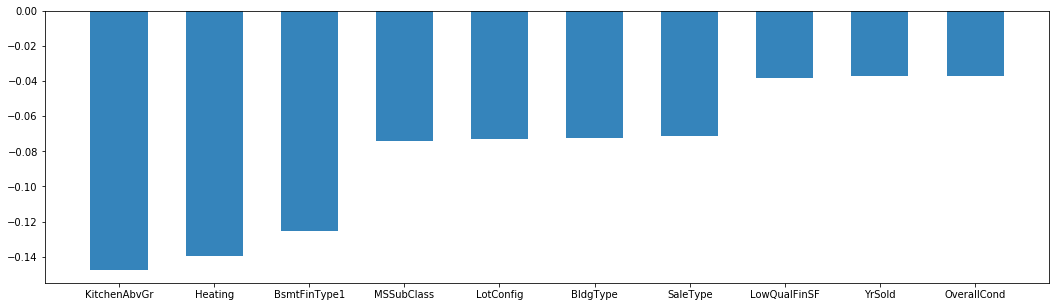

In [82]:
plt.subplots(figsize=(18,5))
plt.bar(t.index[10:20], t[10:20], alpha=0.9, width = 0.6 ,lw=1)
plt.show()
plt.close()

In [52]:
sns.countplot( data=t)

TypeError: Must pass values for either `x` or `y`

In [ ]:
selectFeatures

In [17]:
AllData.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [18]:
AllData[numerical_feats].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,5,7,0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,5,7,0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,5,7,0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,5,8,0,0,9,1145.0,192,2000,2000,2008


In [19]:
AllData[categorical_feats].head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,...,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,...,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,...,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in categorical_feats:
    #print(i)
    #print(AllData[i].unique())
    AllData[i]=labelencoder.fit_transform(AllData[i])

In [22]:
Data_train=AllData[:1460]

Data_test=AllData[1460:]

# Linear Regression Model

In [23]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 74 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
3SsnPorch        1460 non-null int64
BedroomAbvGr     1460 non-null int64
BldgType         1460 non-null int32
BsmtCond         1460 non-null int32
BsmtExposure     1460 non-null int32
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtFinType1     1460 non-null int32
BsmtFinType2     1460 non-null int32
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
BsmtQual         1460 non-null int32
BsmtUnfSF        1460 non-null float64
CentralAir       1460 non-null int32
Condition1       1460 non-null int32
Condition2       1460 non-null int32
Electrical       1460 non-null int32
EnclosedPorch    1460 non-null int64
ExterCond        1460 non-null int32
ExterQual        1460 non-null int32
Exterior1st      1460 non-null int32
Exterior2nd      1460 non-null i

In [24]:
Data_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,0,4,3,706.0,0.0,2,...,9,0,1,8,856.0,0,0,2003,2003,2008
1,1262,0,0,3,0,4,1,978.0,0.0,0,...,9,0,1,6,1262.0,0,298,1976,1976,2007
2,920,866,0,3,0,4,2,486.0,0.0,2,...,9,0,1,6,920.0,0,0,2001,2002,2008
3,961,756,0,3,0,1,3,216.0,0.0,0,...,9,0,1,7,756.0,0,0,1915,1970,2006
4,1145,1053,0,4,0,4,0,655.0,0.0,2,...,9,0,1,9,1145.0,0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,0,4,3,0.0,0.0,6,...,9,0,1,7,953.0,0,0,1999,2000,2007
1456,2073,0,0,3,0,4,3,790.0,163.0,0,...,9,0,1,7,1542.0,0,349,1978,1988,2010
1457,1188,1152,0,4,0,1,3,275.0,0.0,2,...,9,0,1,9,1152.0,0,0,1941,2006,2010
1458,1078,0,0,2,0,4,2,49.0,1029.0,2,...,9,0,1,5,1078.0,0,366,1950,1996,2010


In [25]:
SalePrice_Log

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice_Log, Length: 1460, dtype: float64

In [26]:
X=AllData[:1460]
y=SalePrice_Log

In [27]:
len(X)

1460

In [28]:
len(y)

1460

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8859484756143199

In [30]:
Data_test=AllData[1460:]

In [31]:
price=reg.predict(Data_test)
Data_res=Data_test[['Id','MSSubClass']]
Data_res['SalePrice']=np.exp(price)
Data_res.drop('MSSubClass',axis=1,inplace=True)
Data_res.to_csv('LinearReg4-2.csv',index=False)

# You advanced 2,959 places on the leaderboard!
# Your submission scored 0.13424, which is an improvement of your previous score of 0.48086